In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display
from scipy import stats
from sklearn.model_selection import train_test_split

%matplotlib inline 
np.random.seed(42)

### Loading From UCI (Train and validation data)
- 500 columns
- 2000 obs from training, and 2000 obs from validation $\Rightarrow$ 4000 total observations (combined into one DF)

In [2]:
#load the txt file
filename1 = 'madelon_train.data.txt'
labels1 = 'madelon_train.labels.txt'
filename2 = 'madelon_valid.data.txt'
labels2 = 'madelon_valid.labels.txt'

madelon_train = pd.read_csv(filename1, sep = ' ', header=None)
madelon_labels = pd.read_csv(labels1, sep = ' ', header=None)

In [3]:
madelon_valid = pd.read_csv(filename1, sep = ' ', header=None)
madelon_labels2 = pd.read_csv(labels1, sep = ' ', header=None)

In [5]:
madelon_valid = madelon_valid.drop(500, axis = 1)
madelon_valid[500] = madelon_labels2

In [6]:
madelon_train = madelon_train.drop(500, axis = 1)

In [7]:
madelon_train[500] = madelon_labels

In [8]:
madelon_train.shape #2000 observations of 500 features

(2000, 501)

In [9]:
madelon = pd.concat([madelon_train, madelon_valid])

In [10]:
madelon = madelon.reset_index(drop = True)

### Sampling
- Sample = 1500, Population = 4000
- 95% CI
- 2% margin of error


In [11]:
df1 = madelon.sample(n = 1500, random_state=42)

In [12]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
555,486,516,488,478,519,480,532,475,484,469,...,482,472,629,476,447,481,465,600,456,-1
3491,478,462,512,490,511,476,545,476,505,468,...,483,516,538,532,480,471,483,524,466,1
527,496,441,509,479,537,483,378,476,466,473,...,469,501,499,466,553,484,482,542,484,-1
3925,479,467,414,501,502,479,576,478,491,474,...,478,496,484,477,461,476,485,486,512,-1
2989,484,464,520,485,538,492,510,476,485,463,...,478,476,504,464,509,482,506,526,483,-1


### Basic EDA
- not really a whole lot we can do, just familiarize ourselves with the data a little more

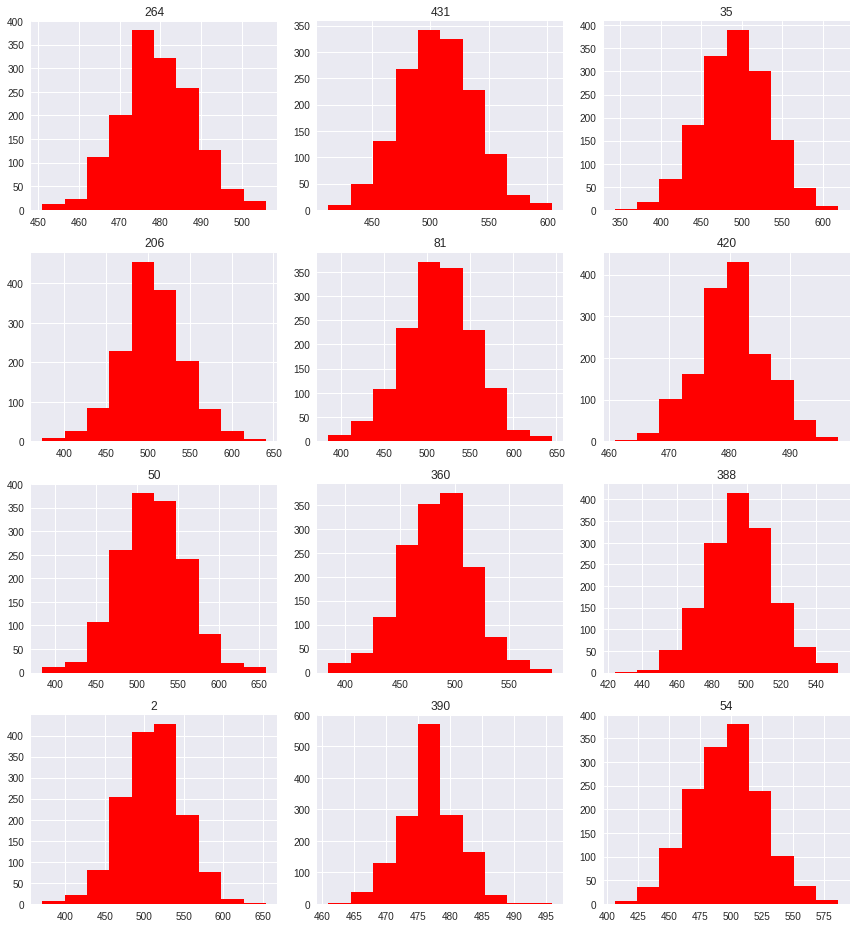

In [14]:
#looking at random histograms of the data
np.random.seed(42)
number = np.random.randint(1,500,90)
fig = plt.figure(figsize = (12,13))
j = 0

for i in number[78:90]:
    j += 1
    fig.add_subplot(4,3,j)
    plt.hist(df1[i], color='r') #'b', 'r', 'y', 'k', 'w'
    plt.title(i)
    # plt.savefig
    
plt.tight_layout()

In [58]:
df1[number[:12]].describe() #just to get an idea

,2,14,21,21,22,35,49,50,51,53,54,55
count,500.000000,500.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,510.416000,484.618000,492.79600,492.79600,476.974000,488.080000,479.478000,517.558000,505.328000,479.968000,497.972000,495.936000
std,37.602644,11.916378,21.71436,21.71436,6.756673,42.341223,25.519875,40.986809,38.306804,4.938801,29.128614,21.675321
min,371.000000,452.000000,433.00000,433.00000,459.000000,343.000000,414.000000,384.000000,382.000000,465.000000,406.000000,433.000000
25%,486.000000,476.000000,477.00000,477.00000,472.000000,460.000000,461.000000,491.000000,480.000000,476.750000,477.000000,480.750000
50%,512.000000,484.000000,493.00000,493.00000,477.000000,488.500000,480.000000,517.000000,506.000000,480.000000,498.000000,496.000000
75%,535.250000,493.000000,507.00000,507.00000,481.000000,514.000000,496.000000,546.000000,529.000000,483.000000,517.000000,510.000000
max,632.000000,523.000000,571.00000,571.00000,494.000000,619.000000,561.000000,629.000000,638.000000,497.000000,598.000000,561.000000


In [15]:
df1[500].value_counts()  # ~50% distribution of classes

 1    766
-1    734
Name: 500, dtype: int64

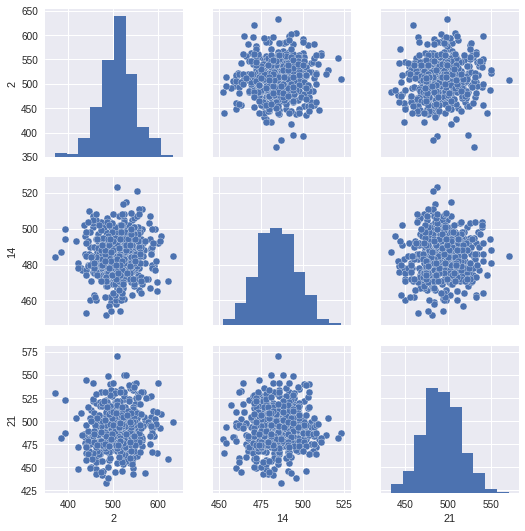

In [60]:
sns.pairplot(df1[number[:3]])

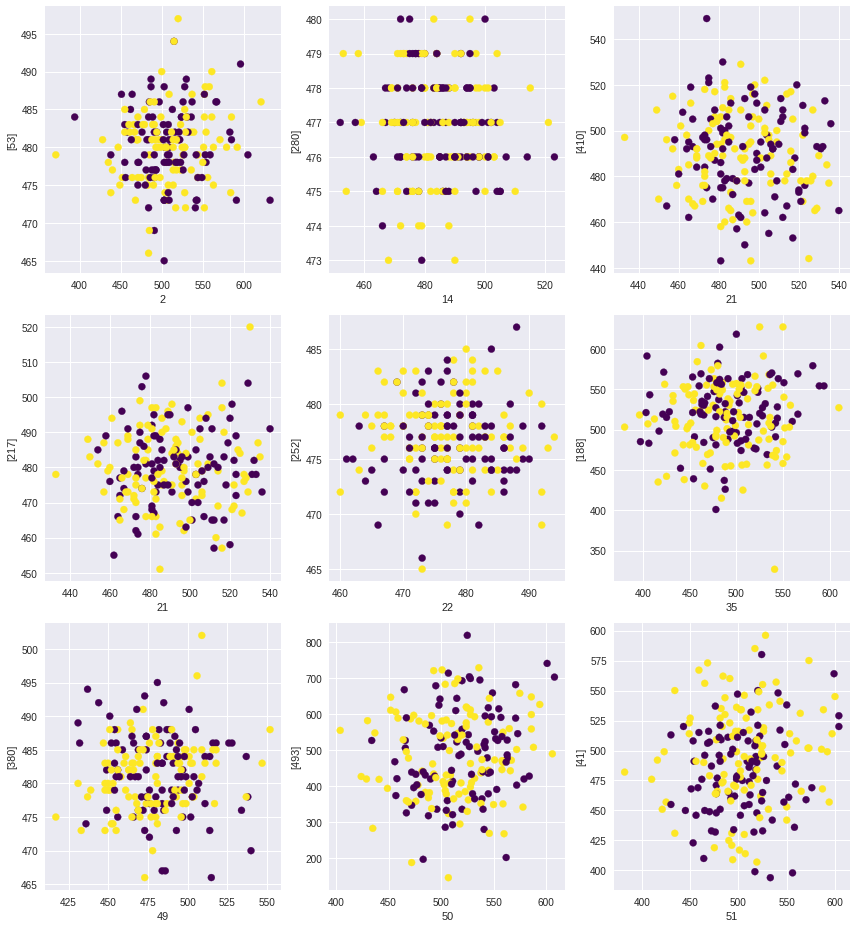

In [25]:
#np.random.seed(42)
#number = np.random.randint(1,500,90)
fig = plt.figure(figsize = (12,13))
j = 0

for i in number[:9]:
    j += 1
    fig.add_subplot(3,3,j)
    n = np.random.randint(1,500,1)
    plt.scatter(df1[i], df1[n], c=df1[500], cmap = 'viridis')
    plt.xlabel(i)
    plt.ylabel(n)
    #plt.legend(df1[500])
    # plt.savefig
    
plt.tight_layout()

### Getting rid of noisy features
- Ideally we will reduce from our 500 features to a much more reasonable number
- Josh's method "leave one out regressor" and compare the $R^{2}$ (not so sure about this)
- We'll also try f_classif

### f_classif Method

In [13]:
from sklearn.feature_selection import f_classif, SelectKBest

In [14]:
X = df1.drop(500, axis = 1)
y = df1[500]

In [15]:
f, pvals = f_classif(X,y)

In [16]:
col_and_pvals = list(zip(pvals, X.columns))

In [17]:
col_and_pvals = pd.DataFrame(col_and_pvals)

In [18]:
important_features = col_and_pvals[col_and_pvals[0] < .01]

In [19]:
important_features = important_features.drop(1, axis = 1)

In [20]:
important_features = important_features.sort_values(by = 0)

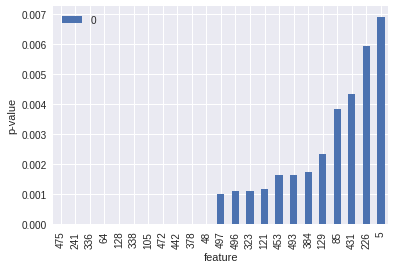

In [21]:
important_features.plot.bar(x = important_features.index, y = 0)
plt.ylabel('p-value')
plt.xlabel('feature')
#the smaller the bar the larger the significance

In [22]:
important = important_features.index

### This process gave us 23 possible important features
- 5,  48,  64,  85, 105, 121, 128, 129, 226, 241, 323, 336, 338, 378, 384, 431, 442, 453, 472, 475, 493, 496, 497

### Leave one out regression and compare $R^{2}$

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [24]:
def calculate_r_2_for_feature(data, feature, model):
    new_data = data.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(new_data,data[feature],test_size=0.25, random_state = 42)

    scaler = StandardScaler()
    scaler.fit(X_train, y_train)
    X_tr_sc = scaler.transform(X_train, y_train)
    X_ts_sc = scaler.transform(X_test, y_test)
    
    regressor = model()
    regressor.fit(X_train, y_train)

    score = regressor.score(X_test, y_test)
    return score

In [25]:
knr_scores = []

for i in range(df1.shape[1] - 1):
    #print(i)
    knr_scores.append(calculate_r_2_for_feature(df1.drop(500, axis = 1), df1.columns[i], KNeighborsRegressor))

In [26]:
feature_score = list(zip(df1.columns, knr_scores))

In [27]:
s_df = pd.DataFrame(feature_score)

In [28]:
decent_features = s_df[s_df[1] > .0]

In [29]:
decent_features = decent_features.drop(0, axis = 1)

In [30]:
decent_features.shape

(20, 1)

In [31]:
decent_features = decent_features.sort_values(by = 1)

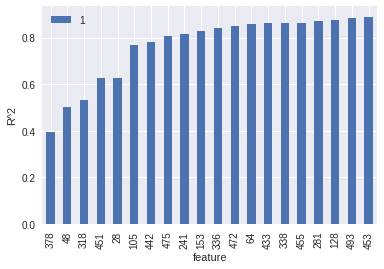

In [32]:
decent_features.plot.bar(x = decent_features.index, y = 1)
plt.ylabel('R^2')
plt.xlabel('feature')

In [33]:
decent = np.sort(decent_features.index) #20 decent features

In [34]:
decent

array([ 28,  48,  64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433,
       442, 451, 453, 455, 472, 475, 493])

### This process gave us 20 important features
- 28,  48,  64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 455, 472, 475, 493
### Compare to First process
- 5, 48, 64, 85, 105, 121, 128, 129, 226, 241, 323, 336, 338, 378, 384, 431, 442, 453, 472, 475, 493, 496, 497

### Similar results 
- We'll move forward with the 20 from Josh's method because thats what everyone else is doing

### EDA with the reduced feature list

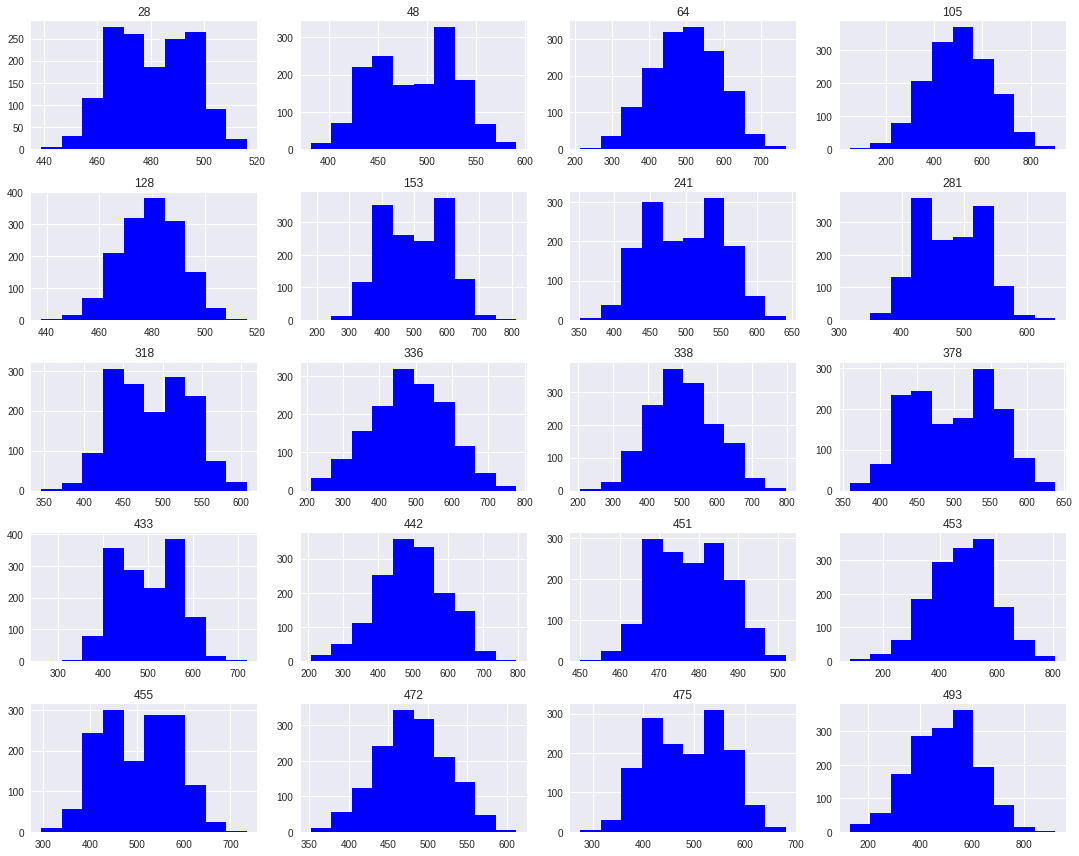

In [60]:
fig = plt.figure(figsize = (15,12))
j = 0

for i in decent:
    j += 1
    fig.add_subplot(5,4,j)
    plt.hist(df1[i], color= 'b') #'b', 'r', 'y', 'k', 'w'
    plt.title(i)
    # plt.savefig
    
plt.tight_layout()

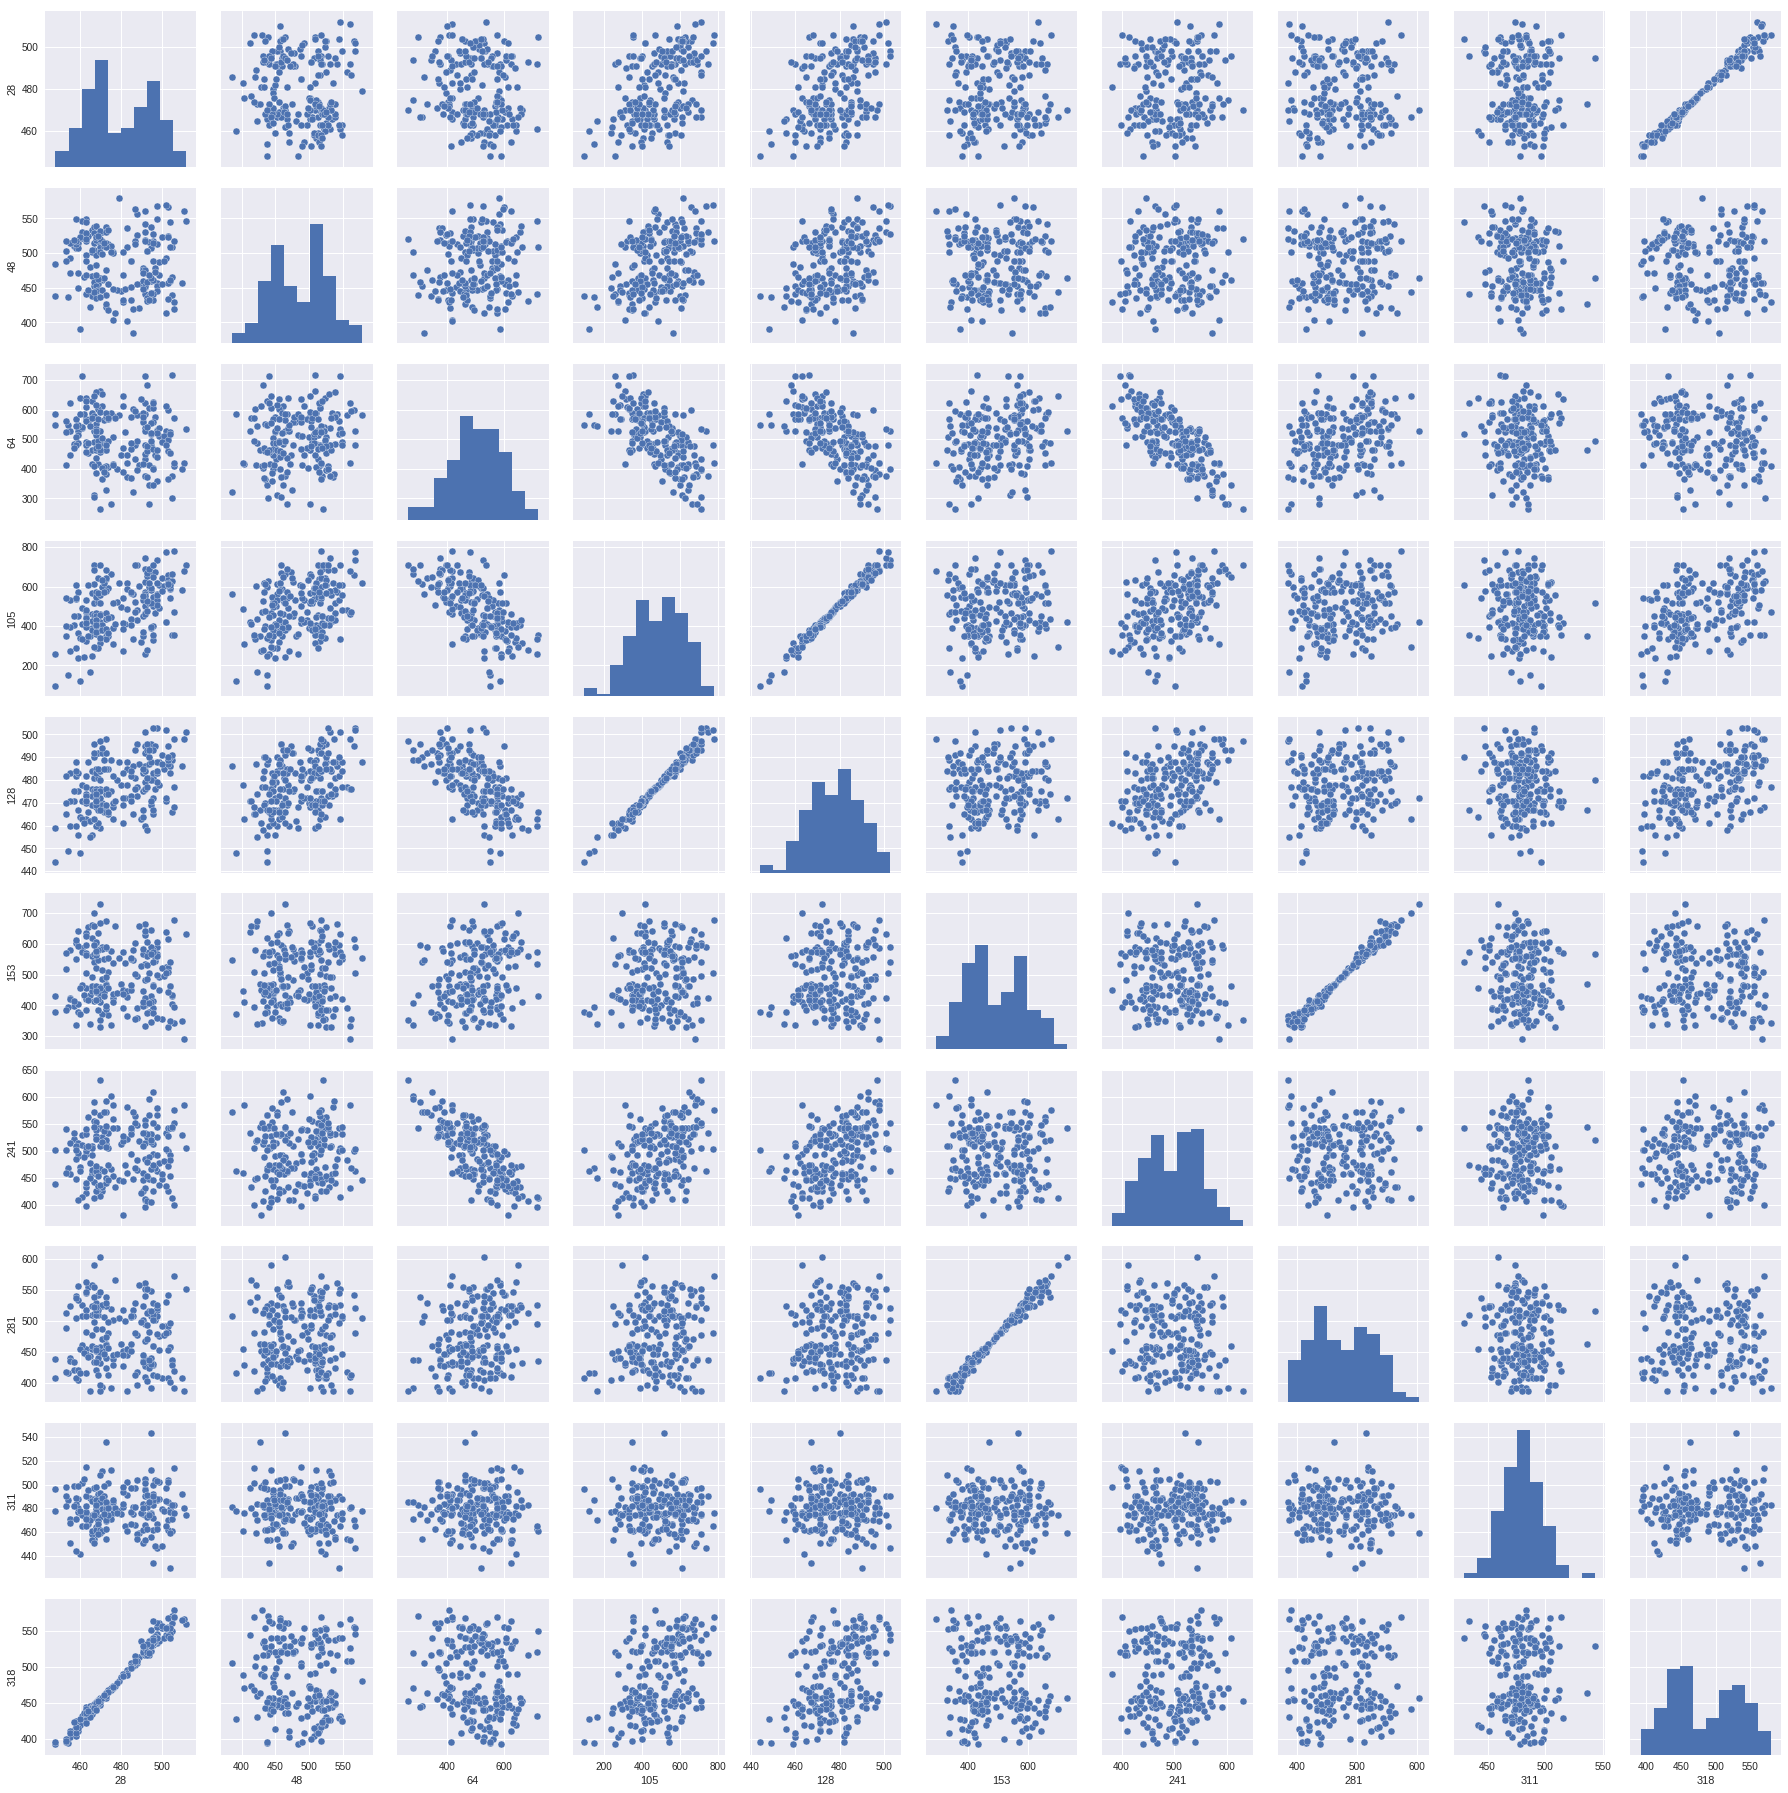

In [19]:
decent
sns.pairplot(df1[decent[:10]])

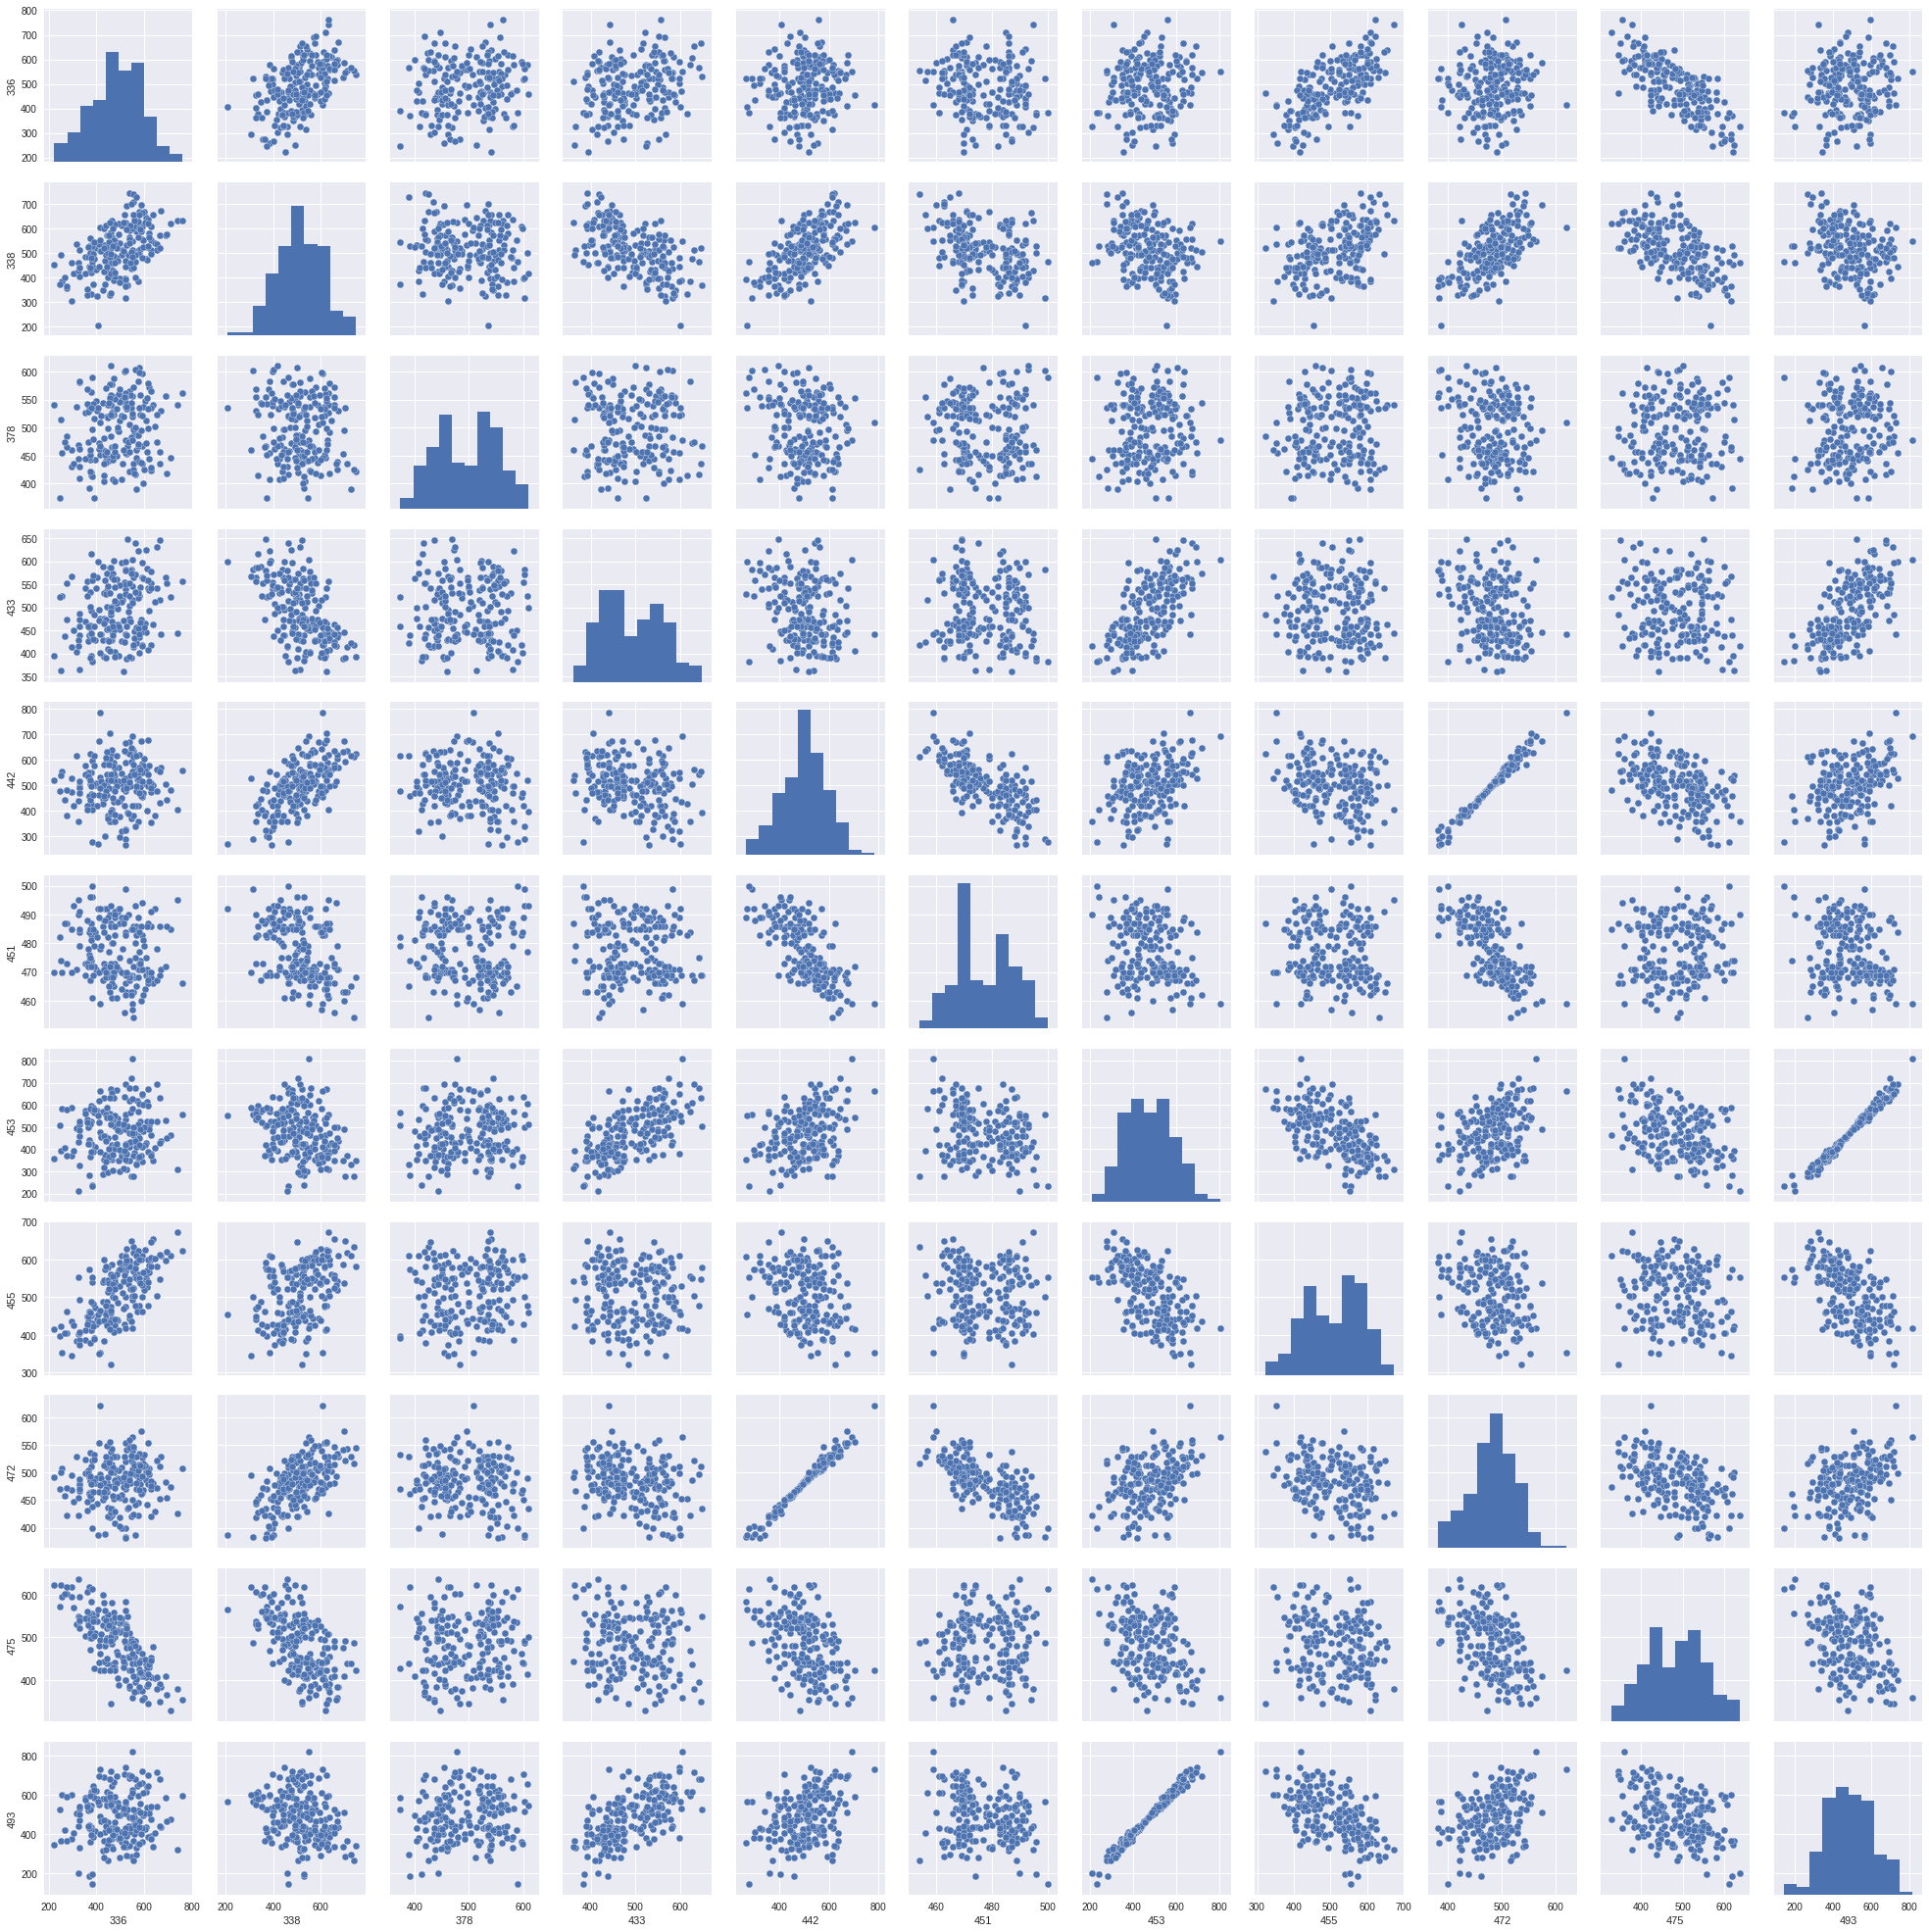

In [28]:
sns.pairplot(df1[decent[10:]])

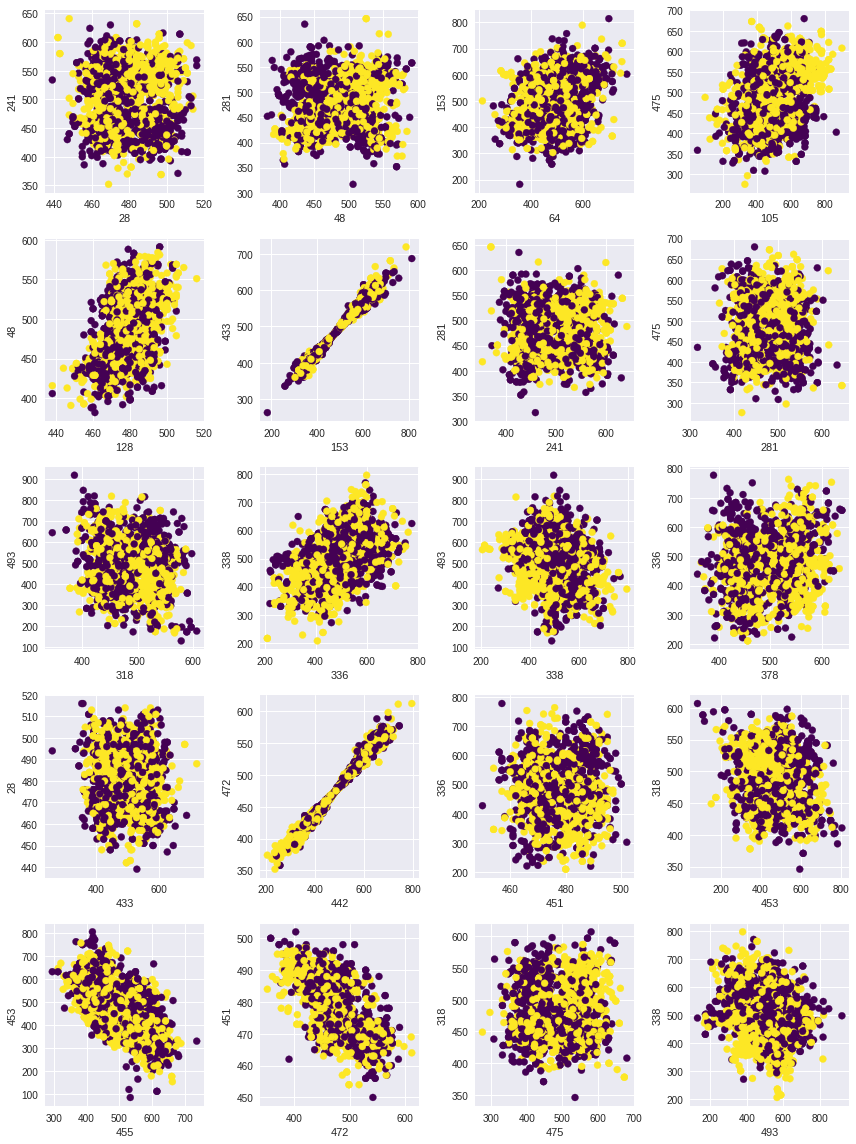

In [34]:
np.random.seed(40)
fig = plt.figure(figsize = (12,16))
j = 0

for i in decent:
    j += 1
    fig.add_subplot(5,4,j)
    n = np.random.choice(decent)
    plt.scatter(df1[i], df1[n], c=df1[500], cmap = 'viridis')
    plt.xlabel(i)
    plt.ylabel(n)
    #plt.legend(df1[500])
    # plt.savefig
    
plt.tight_layout()

In [117]:
X = df1[decent]
y = df1[500]

In [118]:
cor = X.corr()

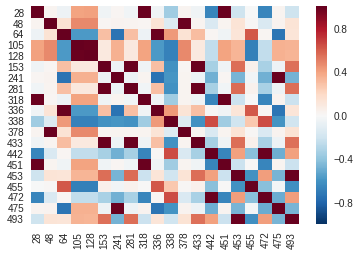

In [119]:
sns.heatmap(cor)

In [120]:
big_cor = cor.where(abs(cor) > .8)

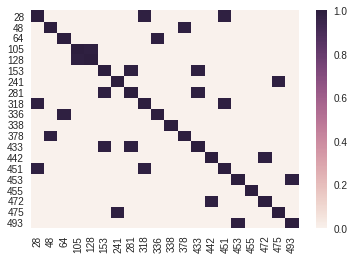

In [121]:
sns.heatmap(big_cor.replace(np.nan, 0)) #lots of high correlations => bad.....fuck

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

In [123]:
def fit_benchmark_model(X, y, model, name):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    #scale the data
    scaler = StandardScaler()
    # Fit_transform
    X_train_scaled = scaler.fit_transform(X_train)
    # transform
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    return (name, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

In [124]:
fit_benchmark_model(X, y, LogisticRegression(C = 100), 'Logistic Regression')

('Logistic Regression', 0.63022222222222224, 0.55466666666666664)

In [125]:
fit_benchmark_model(X, y, KNeighborsClassifier(), 'KNN')

('KNN', 0.93244444444444441, 0.89066666666666672)

In [126]:
fit_benchmark_model(X, y, DecisionTreeClassifier(), 'Decision tree')

('Decision tree', 1.0, 0.80266666666666664)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
y_pred = knn.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[156,  24],
       [ 17, 178]])

### Preprocessing on 20 important features
- Removing Skew
- Feature Selection (regularization, Choose K-best, RFE)
- Fit some more models
- Maybe PCA

In [127]:
import scipy.stats as st
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

In [129]:
X_box_cox = pd.DataFrame()
for col in X.columns:
    box_cox_trans = st.boxcox(X[col])[0]
    X_box_cox[col] = pd.Series(box_cox_trans)

In [130]:
scaler.fit(X_box_cox)
X_box_cox_sc = scaler.transform(X_box_cox)
X_box_cox_df = pd.DataFrame(X_box_cox_sc, columns=X.columns)

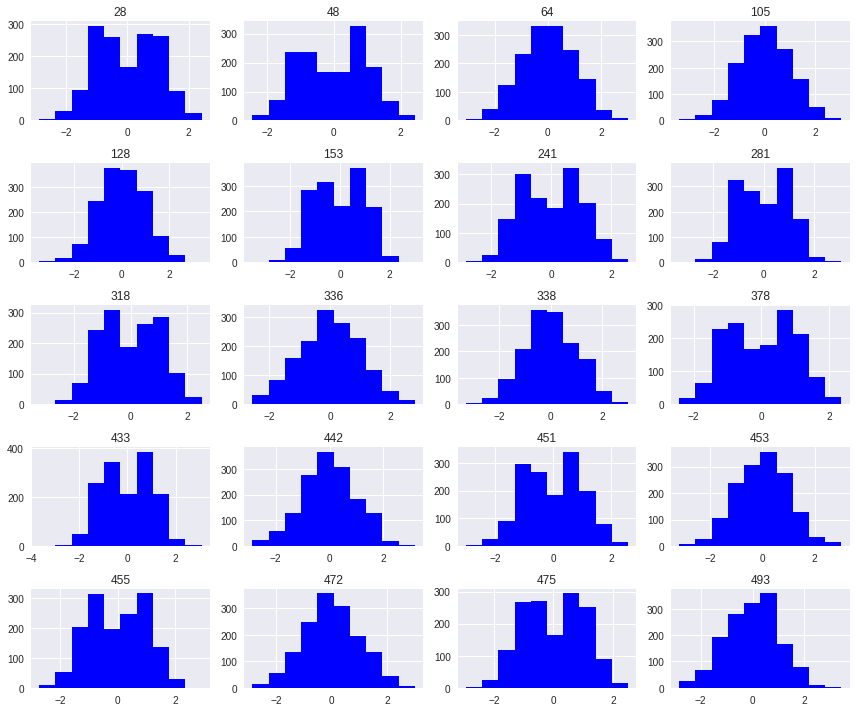

In [50]:
fig = plt.figure(figsize = (12,10))
j = 0

for i in decent:
    j += 1
    fig.add_subplot(5,4,j)
    plt.hist(X_box_cox_df[i], color= 'b') #'b', 'r', 'y', 'k', 'w'
    plt.title(i)
    # plt.savefig
    
plt.tight_layout()

In [131]:
from sklearn.feature_selection import SelectKBest, \
                                      SelectFromModel, \
                                      RFE, SelectPercentile

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

skb = SelectKBest(k=5)

skb.fit(X_train,y_train)

SelectKBest(k=5, score_func=<function f_classif at 0x7f738dc12a60>)

In [56]:
skb.pvalues_

array([  8.69629890e-02,   4.39136935e-05,   2.51122215e-09,
         5.60752979e-08,   3.53074511e-08,   2.79526859e-01,
         1.88105571e-17,   2.21376483e-01,   8.15811247e-02,
         1.05786269e-09,   2.15935876e-08,   2.42155446e-05,
         2.78756815e-01,   5.53441536e-08,   7.48912738e-02,
         5.86625701e-05,   6.78902088e-01,   3.10009590e-08,
         1.90572091e-17,   5.13757801e-05])

In [57]:
mask = skb.get_support()

In [58]:
skb_feats = np.where(skb.get_support())[0]
skb_feats

array([ 2,  6,  9, 10, 18])

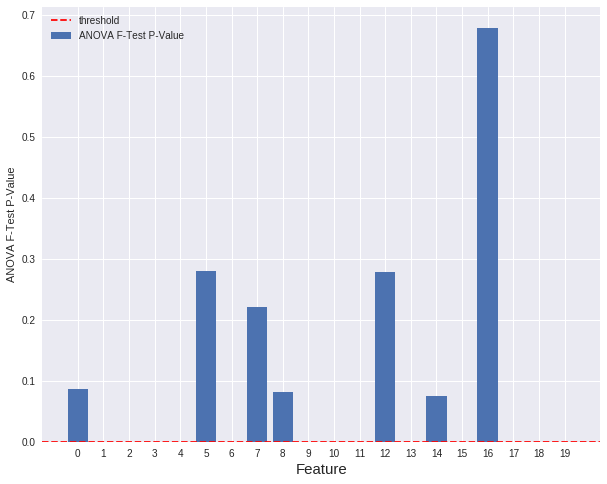

In [56]:
pvals = list(skb.pvalues_)
pvals.sort()
line_loc = np.mean(pvals[4:6])

plt.figure(figsize=(10,8))
plt.bar(range(0,20), skb.pvalues_, label = 'ANOVA F-Test P-Value')
plt.axhline(line_loc, c='r', ls = '--', label = 'threshold')
plt.xticks(range(0,20))
plt.xlabel('Feature', fontsize=15)
plt.ylabel('ANOVA F-Test P-Value')
plt.legend()
plt.show()

In [147]:
decent #2,  6,  9, 10, 18       64, 241, 336, 338, 475

Int64Index([ 28,  48,  64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433,
            442, 451, 453, 455, 472, 475, 493],
           dtype='int64')

In [133]:
decent8 = [336, 378, 338, 433, 451, 455, 472, 475]
decent5 = [64, 241, 336, 338, 475]

In [134]:
X1 = X[decent8]
X2 = X[decent5]

In [135]:
fit_benchmark_model(X1, y, KNeighborsClassifier(n_neighbors=3), 'KNN')

('KNN', 0.9555555555555556, 0.89333333333333331)

In [136]:
fit_benchmark_model(X2, y, KNeighborsClassifier(n_neighbors=3), 'KNN')

('KNN', 0.86311111111111116, 0.66133333333333333)

In [137]:
fit_benchmark_model(X1, y, DecisionTreeClassifier(max_depth=14), 'DTC')

('DTC', 1.0, 0.81333333333333335)

In [138]:
fit_benchmark_model(X2, y, DecisionTreeClassifier(max_depth=14), 'DTC')

('DTC', 0.90222222222222226, 0.70133333333333336)

### Trying PCA on the 20 important features

In [139]:
#pca
from sklearn.decomposition import PCA

In [140]:
X = X_box_cox_df[decent]
subjective_pca = PCA(n_components=5)
subjective_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [141]:
subjective_pca.explained_variance_ratio_ #~99% of variance accounted for

array([ 0.30727438,  0.23823761,  0.20301608,  0.13797097,  0.10553632])

In [142]:
0.30727438+0.23823761+0.20301608+0.13797097+0.10553632

0.9920353600000001

In [143]:
subjective_pca.components_

array([[ 0.26346775,  0.09420263, -0.22661677,  0.30778804,  0.30809939,
         0.06240829,  0.27187005,  0.06333798,  0.26327491, -0.22551994,
        -0.34055143,  0.09396253,  0.06186389, -0.30709165,  0.26285017,
        -0.06569936, -0.09064551, -0.30702602,  0.27477133, -0.0661805 ],
       [-0.04306687,  0.11344785,  0.15209587,  0.13303446,  0.13252813,
         0.38826154, -0.16540547,  0.39065505, -0.04418411,  0.15127251,
        -0.19236186,  0.1136547 ,  0.38963313,  0.00979977, -0.04415722,
         0.40355763, -0.12639423,  0.01346241, -0.16289449,  0.40248772],
       [-0.21471064,  0.03124081, -0.34781538,  0.22976643,  0.22820311,
        -0.14018462,  0.11462338, -0.13942093, -0.21803876, -0.34981624,
        -0.01758684,  0.03148779, -0.14166634,  0.30602549, -0.21784812,
         0.18287075, -0.41125226,  0.30569397,  0.11125318,  0.1845591 ],
       [-0.31025097, -0.23009007, -0.12148347, -0.19244004, -0.19432917,
         0.24478569,  0.33832856,  0.23836117, -

In [144]:
X_pca = subjective_pca.transform(X)
X_pca = pd.DataFrame(X_pca)

In [145]:
fit_benchmark_model(X_pca, y, KNeighborsClassifier(), 'KNN')

('KNN', 0.93422222222222218, 0.89600000000000002)

In [146]:
fit_benchmark_model(X_pca, y, DecisionTreeClassifier(max_depth = 14), 'DTC')

('DTC', 1.0, 0.82133333333333336)

### Moving forward with the 8 important features, and PCA on the 20 features
- Tune parameters for KNN and RandomForrest

In [147]:
from sklearn.model_selection import GridSearchCV

### First with 8 important features
- First with KNN

In [163]:
X = X[decent8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(X_train_scaled, y_train)
knc_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [165]:
knc_gs.score(X_train_scaled, y_train), knc_gs.score(X_test_scaled, y_test)

(0.95466666666666666, 0.89600000000000002)

In [166]:
knc_gs.best_params_

{'n_neighbors': 3}

In [167]:
knc_gs.best_score_

0.88355555555555554

In [162]:
y_pred = knc_gs.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[158,  22],
       [ 17, 178]])

- now with a RandomForrest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
X = X[decent8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
rfparams = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10, None]
}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=rfparams, cv=5,n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_gs.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}

In [99]:
rf_gs.score(X_train, y_train), rf_gs.score(X_test, y_test)

(1.0, 0.88800000000000001)

### Now we'll do the same with PCA

In [100]:
X = X_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(X_train_scaled, y_train)
knc_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [102]:
knc_gs.score(X_train_scaled, y_train), knc_gs.score(X_test_scaled, y_test)

(0.95199999999999996, 0.89600000000000002)

RandomForrest

In [103]:
X = X_pca

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
rfparams = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2']
}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=rfparams, cv=5,n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_gs.best_params_

{'max_features': 'log2', 'n_estimators': 50}

In [105]:
rf_gs.score(X_train, y_train), rf_gs.score(X_test, y_test)

(1.0, 0.8746666666666667)

### Best performing models
- KNN with these 8 features 
- KNN with PCA